# Plot divergence trees with baltic


In [1]:
import sys, subprocess, glob, os, shutil, re, importlib
from subprocess import call
import imp
import baltic as bt
# bt = imp.load_source('baltic', '/Users/lmoncla/src/baltic/baltic/baltic.py')


%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import matplotlib.colors as clr
import textwrap as textwrap
from textwrap import wrap

import numpy as np
import json
import pandas as pd
from scipy.special import binom

In [41]:
nextstrainPath='../dengue/auspice/dengue_denv1.json'
json_translation={'absoluteTime':lambda k: k.traits['node_attrs']['num_date']['value'],'name':'name'}
tree, metadata = bt.loadJSON(nextstrainPath,json_translation=json_translation)


Tree height: 113.598340
Tree length: 5055.733458
annotations present

Numbers of objects in tree: 2004 (933 nodes and 1071 leaves)



In [19]:
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('text', usetex='false') 
mpl.rcParams.update({'font.size': 22})
cmap = {'unassigned': 'gray', "DENV1/I": 'purple', 
        "DENV1/II":'blue', "DENV1/III":'green', "DENV1/IV":'yellow', "DENV1/V":'red'}

[Text(0, -200.0, ''),
 Text(0, 0.0, ''),
 Text(0, 200.0, ''),
 Text(0, 400.0, ''),
 Text(0, 600.0, ''),
 Text(0, 800.0, ''),
 Text(0, 1000.0, ''),
 Text(0, 1200.0, '')]

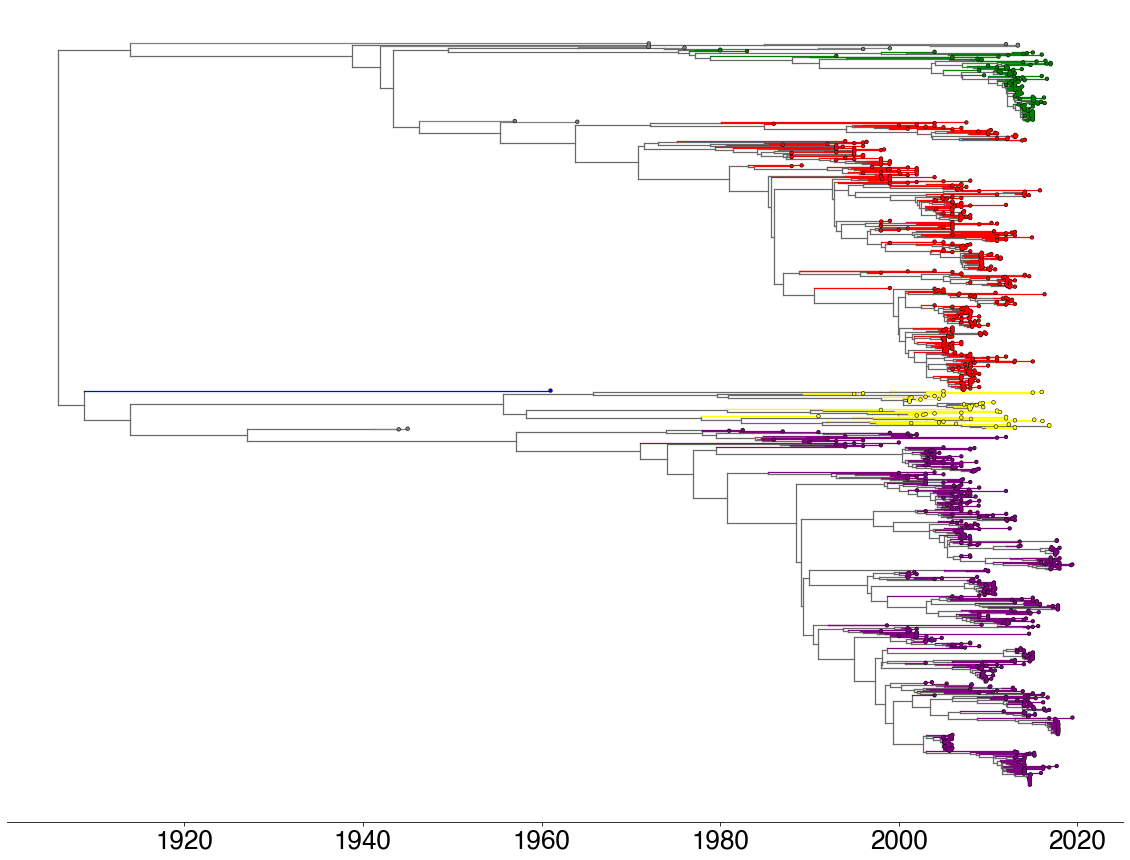

In [42]:
fig,ax = plt.subplots(figsize=(20,15),facecolor='w')
branchWidth=1.25 ## default branch width
tipSize = 40
labelSize = 10

# k objects are tips, nodes, branches
for k in tree.Objects: ## iterate over objects in tree
    y=k.y ## or use absolute time instead
    x=k.absoluteTime


    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if 'node_attrs' in k.parent.traits:
        xp=k.parent.absoluteTime ## get x position of current object's parent
    else:
        xp = x

    if isinstance(k,bt.leaf) or k.branchType=='leaf': ## if leaf...
        #x=decimalDate(k.name.split('_')[-1],variable=True) ## get x position from name
        strain = k.name
        clade = k.traits['node_attrs']['clade_membership']['value']
        c=cmap[clade]

        s=tipSize 
        m = "."
        z=11
        label_text = ""
        c=cmap[clade]
        label_position = k.absoluteTime, k.y

        ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',marker=m,zorder=z) ## plot circle for every tip
        ax.scatter(x,y,s=s+0.8*s,facecolor='k',edgecolor='none',marker=m,zorder=10) ## plot black circle underneath

    elif isinstance(k,bt.node) or k.branchType=='node': ## if node...
        c="#696969"
        ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9) #color=node_colors[node_types[k]["node_community_status"]]

    ax.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)

[ax.spines[loc].set_visible(False) for loc in ['left','right','top']] ## no axes
ax.tick_params(axis='y',size=0)
ax.tick_params(axis='x',labelsize=26)
ax.set_yticklabels([])
